<a href="https://colab.research.google.com/github/itsadi1/Machine-Learning-Training-Testing/blob/main/Data_Visualization%26Regression_Model_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load modules
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [2]:
#Load Dataset
import kagglehub

# Download latest version
path = kagglehub.dataset_download("brandmustafa/ai-dev-performance")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'ai-dev-performance' dataset.
Path to dataset files: /kaggle/input/ai-dev-performance


In [3]:
# Walk the path Tree to locate CSV
for (root,dirs,files) in os.walk(path):
  for file in files:
    if file.endswith(".csv"):
      print(file)

AI_Developer_Performance_Extended_1000.csv


In [4]:
# Load CSV
df = pd.read_csv(os.path.join(path,file))
df.head(10)

,Hours_Coding,Lines_of_Code,Bugs_Found,Bugs_Fixed,AI_Usage_Hours,Sleep_Hours,Cognitive_Load,Task_Success_Rate,Coffee_Intake,Stress_Level,Task_Duration_Hours,Commits,Errors
0,7,416,9,7,6,5.9,92,34,7,99,10.5,20,3
1,4,269,16,13,5,5.1,85,36,2,100,9.5,17,8
2,11,439,3,0,2,6.2,38,79,2,55,18.3,35,2
3,8,472,15,9,4,4.2,26,94,5,30,12.6,28,4
4,5,265,19,16,5,8.1,82,33,6,82,7.0,25,9
5,7,196,14,12,0,8.1,61,39,1,72,6.4,21,8
6,10,516,4,3,6,6.9,61,56,0,66,5.1,16,5
7,3,234,5,1,6,5.8,78,40,2,86,2.9,15,2
8,7,440,16,13,6,8.0,39,75,3,43,10.6,20,9
9,11,297,0,0,0,6.8,92,30,0,100,13.9,11,8


In [5]:
# Analysing and Preprocessing Data

print('Datapoints, Features :',df.shape)
print('Datatype:\n',df.dtypes)
print('Missing values per column:\n',df.isnull().sum())

Datapoints, Features : (1000, 13)
Datatype:
 Hours_Coding             int64
Lines_of_Code            int64
Bugs_Found               int64
Bugs_Fixed               int64
AI_Usage_Hours           int64
Sleep_Hours            float64
Cognitive_Load           int64
Task_Success_Rate        int64
Coffee_Intake            int64
Stress_Level             int64
Task_Duration_Hours    float64
Commits                  int64
Errors                   int64
dtype: object
Missing values per column:
 Hours_Coding           0
Lines_of_Code          0
Bugs_Found             0
Bugs_Fixed             0
AI_Usage_Hours         0
Sleep_Hours            0
Cognitive_Load         0
Task_Success_Rate      0
Coffee_Intake          0
Stress_Level           0
Task_Duration_Hours    0
Commits                0
Errors                 0
dtype: int64


' There are 1000 datapoints with 13 features.\nAll features are numerical.\nThere are no missing values in the dataset.\nThe dataset appears to be clean and ready for use.'

+ There are 1000 datapoints with 13 features.
+ All features are numerical.
+ There are no missing values in the dataset.

**The dataset appears to be clean and ready for use.**

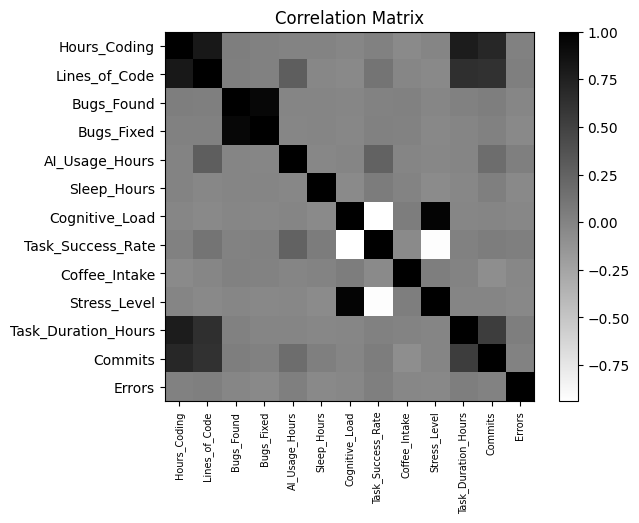

In [6]:
# Correlation Matrix
corr = df.corr()
plt.imshow(corr, cmap='binary', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns,rotation=90,fontsize=7)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title('Correlation Matrix')
plt.show()

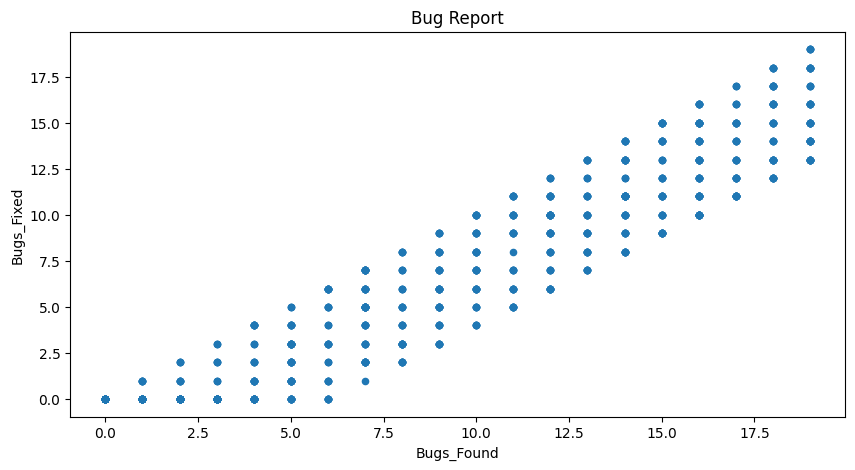

In [7]:
# Bug Report
df.plot(kind='scatter',x='Bugs_Found',y='Bugs_Fixed',figsize=(10,5))
plt.title('Bug Report')
plt.show()

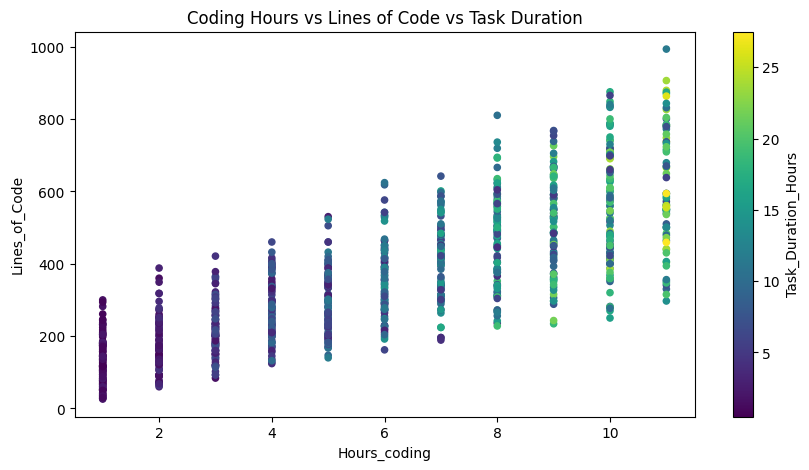

In [8]:
# Quantitative Coding Statistics
df.plot(kind='scatter',x='Hours_Coding',y='Lines_of_Code',c='Task_Duration_Hours',figsize=(10,5))
plt.title("Coding Hours vs Lines of Code vs Task Duration")
plt.xlabel("Hours_coding",fontsize=10)
plt.ylabel("Lines_of_Code",fontsize=10)
plt.show()

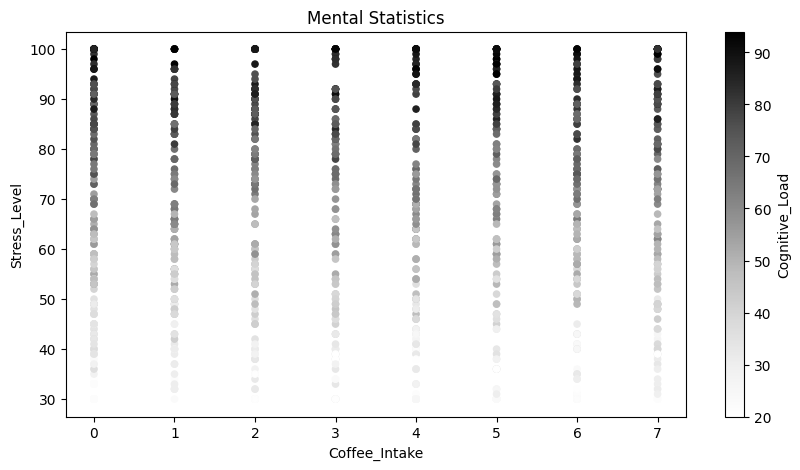

In [9]:
# Mental Statistics
df.plot(kind='scatter',x='Coffee_Intake',y='Stress_Level',figsize=(10,5),c='Cognitive_Load')
plt.title("Mental Statistics")
plt.show()

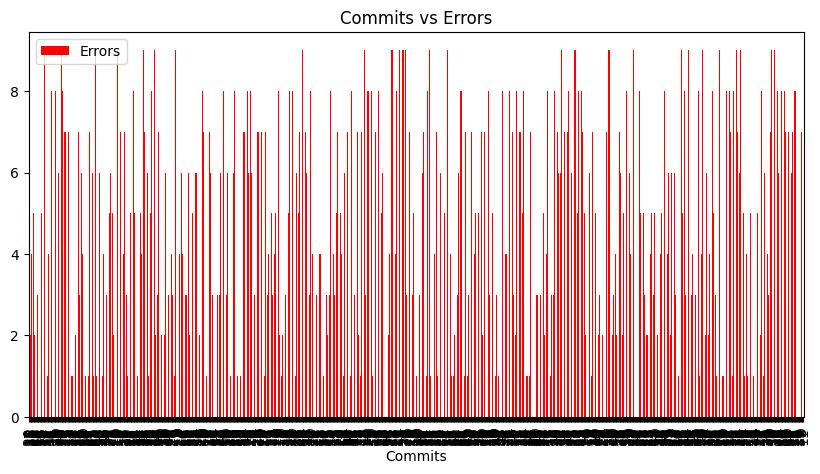

In [10]:
# Commits and Errors
df.plot(kind='bar',x='Commits',y='Errors',figsize=(10,5),color='red')
plt.title("Commits vs Errors")
plt.show()

In [11]:
# Stepping towards Regression Task
features = df.columns.drop('Task_Success_Rate')
target = 'Task_Success_Rate'

X= df[features]
y= df[target]

print("Shape of X =",X.shape)
print("Shape of y =",y.shape)

Shape of X = (1000, 12)
Shape of y = (1000,)


In [12]:
# Preparing Training and Testing Data
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=12)
print("Shape of x_train=",x_train.shape)
print("Shape of x_test=",x_test.shape)
print("Shape of y_train=",y_train.shape)
print("Shape of y_test=",y_test.shape)

Shape of x_train= (700, 12)
Shape of x_test= (300, 12)
Shape of y_train= (700,)
Shape of y_test= (300,)


In [13]:
# Model Training and Testing
GBR = GradientBoostingRegressor()
GBR.fit(x_train,y_train)
score = GBR.score(x_test,y_test)
y_pred = GBR.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'Accuracy: {score:.2f}')
# Additional Metrics
print(f'MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R2 Score: {r2:.2f}')

Accuracy: 0.95
MAE: 3.72, MSE: 21.62, RMSE: 4.65, R2 Score: 0.95
